From DAT5: Kevin Markham class. Source, Kevin Markham GitHub

# Natural Language Processing (NLP)

What is NLP?
* 'Natural language processing (NLP) is a field of computer science, artificial intelligence, and computational linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of human–computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input...' - Wikipedia
* Using computers to process (analyze, understand, generate) natural human languages (as opposed to unnatural computer languages).
* NLP is concerned with the interface between human and computer language.  However, language is often ambiguous, so this isn't always a straightforward task.

Why NLP?
* Most knowledge created by humans is unstructured text, so we need some way to make sense of it.
* Enables quantitative analysis of text data at large scale.
* Provides a repeatable, "unbiased" way to look at text.

## Motivation

For the purpose of this class, we can pretend we are Data Scientists working for Kaggle.  Everyone loves Kaggle, but we're interested into digging a little deeper into what the web is saying about Kaggle.

## Imports

In [3]:
import tweepy # Twitter API wrapper
import nltk # Classic NLP package

## Getting Data

In [7]:
#Variables that contains the user credentials to access Twitter API 
consumer_key = "NxJVcfVU5D9EEBSQvLjRdUeWm" # Replace with your own consumer_key
consumer_secret = "gKaVY667c6nH1uzhNE5WPxJg9QE4h4HrMxvozu94xfd4ncS158" # Replace with your own consumer_secret

# Create authorization for API
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)

# Initialize API object by passing it your credentials
api = tweepy.API(auth)

# Use the api to search
tweets = api.search(q="realDonaldTrump", count=10, result_type="recent")
print(tweets[0])

Status(_api=<tweepy.api.API object at 0x1a204a1a90>, _json={'created_at': 'Thu Sep 26 00:54:18 +0000 2019', 'id': 1177023558100410369, 'id_str': '1177023558100410369', 'text': "RT @TeamTrump: VP @mike_pence: Democrats don't have an agenda, that's why they want to impeach @realDonaldTrump https://t.co/El9qOb6bkq", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TeamTrump', 'name': 'Team Trump', 'id': 729676086632656900, 'id_str': '729676086632656900', 'indices': [3, 13]}, {'screen_name': 'mike_pence', 'name': 'Mike Pence', 'id': 22203756, 'id_str': '22203756', 'indices': [18, 29]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [95, 111]}], 'urls': [], 'media': [{'id': 1177010297581854720, 'id_str': '1177010297581854720', 'indices': [112, 135], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1177010297581854720/pu/img/Dcaa-avGUUD7qtZ6.jpg', 'media_url_https': 'https:/

In [8]:
tweets[0].text

"RT @TeamTrump: VP @mike_pence: Democrats don't have an agenda, that's why they want to impeach @realDonaldTrump https://t.co/El9qOb6bkq"

Some quick vocab:
* **corpus** - collection of documents
* **corpora** - plural form of corpus

Let's build our corpus of tweets.

In [11]:
tweets_text = []
for tweet in tweepy.Cursor(api.search, q='realDonaldTrump', result_type='recent').items(1000):
    tweets_text.append(tweet.text.encode('ascii','ignore'))
print(tweets_text[0:10])

[b"Second time in two weeks or so @WashingtonPost cited @1100Penn's reporting on how @realDonaldTrump profits from his https://t.co/2aRl3V5Exy", b'@SenThomTillis @realDonaldTrump https://t.co/DPMSRayxzX', b'@iikelizardsalot @rww_gop @ChatByCC @realDonaldTrump @All Instead you would rather give your vote and therefore you https://t.co/rwcdDrHBb8', b'RT @RealCandaceO: Lets be real: The Democrats are not calling to impeach @realDonaldTrumpthey are calling to impeach the democratic proce', b'@CKG1959 @realDonaldTrump @POTUS Amen', b'@BillOReilly No, Predator @BillOReilly.\n\nThe genesis of it lies with a crooked Un-@realDonaldTrump desperate to rem https://t.co/8NJiOBmJbJ', b'Lincoln, Kennedy, &amp; Reagan are just a few of our Presidents that were fucking shot you dumb twat. https://t.co/gJoQstdjhT', b'@GOPLeader @realDonaldTrump @JudiciaryGOP @HouseGOP Grasp that straw traitor!!!', b'RT @tedlieu: GRAVE facts:\n\n-@realDonaldTrump halts military aid to Ukraine.\n\n-@POTUS then sets foreig

Since I did not provide my credentials above, I saved all of the tweet text to a CSV file.  We can read it back into a list.

In [14]:
# Running this will overwrite the current data.

with open('../data/trump_tweets.csv','w') as f:
    for tweet in tweets_text:
        f.write('"%s"\n' % tweet)


In [15]:
with open('../data/trump_tweets.csv','r') as f:
    tweets_text = [tweet.replace('\n','').replace('"','') for tweet in f.readlines()]

In [16]:
tweets_text[0]

"bSecond time in two weeks or so @WashingtonPost cited @1100Penn's reporting on how @realDonaldTrump profits from his https://t.co/2aRl3V5Exy"

## Tokenization

The first thing we need to do with our corpus of text is to break the documents into smaller units.  This is known as **tokenization**.  There are two natural ways to go about this:  breaking the documents apart into sentences or into words.  This gives more structure to the previously unstructured text.  This also allows us to more easily perform other tasks upon our corpus.

**Note**:  Breaking documents and paragraphs into sentences and words is easier is some languages than others.  English has obvious (to us) breaks in the text for sentences and words.  However, this might not be the case for other languages.  In addition, there are nuances in the English language with hyphenated words and phrases that are independent clauses but might be part of a larger sentence.

First let's try breaking our tweets down into sentences.

In [17]:
# Tokenize into sentences
sentences = []
for tweet in tweets_text:
    for sent in nltk.sent_tokenize(tweet):
        sentences.append(sent)
sentences[:10]

["bSecond time in two weeks or so @WashingtonPost cited @1100Penn's reporting on how @realDonaldTrump profits from his https://t.co/2aRl3V5Exy",
 "b'@SenThomTillis @realDonaldTrump https://t.co/DPMSRayxzX'",
 "b'@iikelizardsalot @rww_gop @ChatByCC @realDonaldTrump @All Instead you would rather give your vote and therefore you https://t.co/rwcdDrHBb8'",
 "b'RT @RealCandaceO: Lets be real: The Democrats are not calling to impeach @realDonaldTrumpthey are calling to impeach the democratic proce'",
 "b'@CKG1959 @realDonaldTrump @POTUS Amen'",
 "b'@BillOReilly No, Predator @BillOReilly.\\n\\nThe genesis of it lies with a crooked Un-@realDonaldTrump desperate to rem https://t.co/8NJiOBmJbJ'",
 "b'Lincoln, Kennedy, &amp; Reagan are just a few of our Presidents that were fucking shot you dumb twat.",
 "https://t.co/gJoQstdjhT'",
 "b'@GOPLeader @realDonaldTrump @JudiciaryGOP @HouseGOP Grasp that straw traitor!!!'",
 "b'RT @tedlieu: GRAVE facts:\\n\\n-@realDonaldTrump halts military aid to Ukrai

Now, let's break our tweets into individual words, referred to as tokens.

In [18]:
# Tokenize into words
tokens = []
for tweet in tweets_text:
    for word in nltk.word_tokenize(tweet):
        tokens.append(word)
tokens[:10]

['bSecond',
 'time',
 'in',
 'two',
 'weeks',
 'or',
 'so',
 '@',
 'WashingtonPost',
 'cited']

This is really messy though.  Do we care about analyzing punctuation and other non alphanumeric characters?  We will exclude those using regular expressions.

In [19]:
# Only keep tokens that start with a letter (using regular expressions)
import re
clean_tokens = [token for token in tokens if re.search('^[a-zA-Z]+', token)]
clean_tokens[:20]# Tokenize into words

['bSecond',
 'time',
 'in',
 'two',
 'weeks',
 'or',
 'so',
 'WashingtonPost',
 'cited',
 'reporting',
 'on',
 'how',
 'realDonaldTrump',
 'profits',
 'from',
 'his',
 'https',
 'b',
 'SenThomTillis',
 'realDonaldTrump']

We can now perform the "hello world" task of text analysis and get a list of the most popular words

In [20]:
# Count the tokens
from collections import Counter
c = Counter(clean_tokens)
c.most_common(25) # Most frequent tokens

[("b'RT", 627),
 ('realDonaldTrump', 556),
 ('the', 492),
 ('https', 388),
 ('to', 326),
 ('b', 292),
 ('a', 225),
 ('of', 188),
 ('in', 158),
 ('and', 154),
 ('you', 146),
 ('is', 141),
 ('for', 131),
 ('I', 108),
 ('are', 100),
 ('The', 92),
 ('was', 83),
 ('President', 82),
 ('it', 79),
 ('be', 77),
 ('on', 73),
 ('literally', 73),
 ('got', 73),
 ('JFK', 69),
 ('Biden', 68)]

What do you notice about this list of words?  Are there any duplicated words?  What should we do about that?

## Stemming and Lemmatizing (Normalizing)

**Stemming** reduces a word to its base (stem) form.  It often makes sense to treat multipe word forms the same way.  

Stemming uses a "simple" rule-based approach that runs very quickly.  The output isn't always the best for irregular words.  Stemmed words are not usually shown to users but rather used for analysis/indexing.

In [21]:
# Initialize stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

# Some exmaples
print('charge:'), stemmer.stem('charge')
print('charging:'), stemmer.stem('charging')
print('charged:'), stemmer.stem('charged')

charge:
charging:
charged:


(None, 'charg')

Let's stem all of our tokens and recompute the count of most popular tokens.

In [22]:
# Stem the tokens
stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]

# Count the stemmed tokens
c = Counter(stemmed_tokens)
c.most_common(25)       # all lowercase

[("b'rt", 627),
 ('the', 590),
 ('realdonaldtrump', 579),
 ('https', 388),
 ('to', 332),
 ('b', 293),
 ('a', 246),
 ('you', 207),
 ('of', 191),
 ('in', 180),
 ('and', 166),
 ('is', 151),
 ('for', 150),
 ('presid', 148),
 ('it', 115),
 ('i', 113),
 ('are', 108),
 ('be', 91),
 ('we', 90),
 ('democrat', 85),
 ('was', 85),
 ('this', 84),
 ('biden', 81),
 ('call', 78),
 ('that', 78)]

However, some of these are still a bit uninterpretable for humans.  That's where lemmatizing comes in.

**Lemmatization**, or normalization, dervies the canonical form (i.e. lemma) of a word.  This can be better than stemming in some cases, because it reduces words to a "normal" form.  This often uses a dictionary based approach and can be slower than stemming.  This is the tradeoff for "better" results.

In [24]:
# Initialize lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

# Compare stemmer to lemmatizer
print('dogs - stemmed:', stemmer.stem('dogs'), ', lemmatized:', lemmatizer.lemmatize('dogs'))

dogs - stemmed: dog , lemmatized: dog


In [25]:
print('wolves - stemmed:', stemmer.stem('wolves'), ', lemmatized:', lemmatizer.lemmatize('wolves'))

wolves - stemmed: wolv , lemmatized: wolf


Let's lemmatize our Twitter dataset.

In [26]:
# Lemmatize the tokens
lemmatized_tokens = [lemmatizer.lemmatize(t).lower() for t in clean_tokens] # I lowercased things too.

# Count the lemmatized tokens
c = Counter(lemmatized_tokens)
c.most_common(25)       # all lowercase

[("b'rt", 627),
 ('the', 590),
 ('realdonaldtrump', 565),
 ('http', 388),
 ('to', 332),
 ('b', 293),
 ('a', 290),
 ('you', 207),
 ('of', 191),
 ('in', 180),
 ('and', 166),
 ('is', 151),
 ('for', 150),
 ('president', 130),
 ('i', 113),
 ('are', 108),
 ('it', 104),
 ('we', 90),
 ('this', 84),
 ('wa', 83),
 ('be', 78),
 ('not', 77),
 ('he', 74),
 ('literally', 74),
 ('on', 73)]

The lemmatizing didn't do much here since msot of the popular words don't have significantly different normal forms.

In [28]:
# One more example
print('is - stemmed:', stemmer.stem('is'), ', lemmatized:', lemmatizer.lemmatize('is'))

is - stemmed: is , lemmatized: is


This is not what I learned in grammar school.  Why isn't the result "be"? 

The lemmatizer assumes everything is a noun unless explicitly told otherwise.

In [29]:
lemmatizer.lemmatize('is',pos='v')

'be'

In [30]:
nltk.pos_tag(nltk.word_tokenize('Lloyld loves NLP'))

[('Lloyld', 'NNP'), ('loves', 'VBZ'), ('NLP', 'NNP')]

## Stopword Removal

**Stopwords** are common words that will most likely appear in any text.  They are "useless" words that don't contain much information.  For the purpose of word counts and other word frequencies, they are not particularly useful.  

Let's remove the stopwords from our tweets and look at the most popular words.

In [32]:
# View the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[0:25])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers']


Now that we have a list of stopwords, we can remove them from our token list.

In [34]:
# Stem the stopwords
stemmed_stops = [stemmer.stem(t) for t in stopwords]

# Remove stopwords from stemmed tokens
stemmed_tokens_no_stop = [stemmer.stem(t) for t in stemmed_tokens if t not in stemmed_stops]
c = Counter(stemmed_tokens_no_stop)
most_common_stemmed = c.most_common(25)

# Remove stopwords from cleaned tokens
clean_tokens_no_stop = [t.lower() for t in clean_tokens if t.lower() not in stopwords]
c = Counter(clean_tokens_no_stop)
most_common_not_stemmed = c.most_common(25)

# Compare the most common results for stemmed words and non stemmed words
for i in range(25):
    text_list = most_common_stemmed[i][0] + '  ' + str(most_common_stemmed[i][1]) + ' '*25
    text_list = text_list[0:30]
    text_list += most_common_not_stemmed[i][0] + '  ' + str(most_common_not_stemmed[i][1])
    print(text_list)

b'rt  627                     b'rt  627
realdonaldtrump  579          realdonaldtrump  565
https  388                    https  388
b  293                        b  293
presid  167                   president  119
democrat  85                  literally  74
biden  81                     got  73
call  78                      shot  69
liter  74                     biden  69
got  73                       jfk  69
impeach  71                   trump  67
shot  70                      face  65
trump  70                     democrats  63
jfk  69                       randalovesbacon  62
face  65                      joe  47
randalovesbacon  62           potus  46
joe  47                       amp  45
stop  47                      gopleader  45
potus  46                     transcript  45
ukrain  46                    brt  45
amp  45                       know  43
goplead  45                   ukraine  40
transcript  45                would  37
brt  45                       news  37
know  44   

These results are a bit more interesting.  You can see the most popular words that occur in the tweets about "kaggle".  We could dig further into this and look at the specific tweets for some of the more interesting occurences.  For instance, it seeems that there are more occurences of "R" than "Python" (which doesn't even show up in our top list).  Does that mean that R is more popular than Python for Kaggle competitions?

## Named Entity Recognition

**Named Entity Recognition (NER)** is the automatic extraction of names, places, organizations, etc.  This can help you identify "important" words.  NER classifiers can work in different ways, but the most interesting and relevant ones use some sort of supervised machine learning technique.  There is some sort of tagged dataset that has a model/algorithm fit to it.  With what we've learned in class so far, you could build your own NER classifier!  However, it's often better to use existing classifiers.  

First, let's build a NER extraction function that takes in a sentence.

In [35]:
def extract_entities(text):
    entities = []
    # tokenize into sentences
    for sentence in nltk.sent_tokenize(text):
        # tokenize sentences into words
        # add part-of-speech tags
        # use NLTK's NER classifier
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        # parse the results
        entities.extend([chunk for chunk in chunks if hasattr(chunk, 'label')])
    return entities

In [37]:
# Let's look at all of the words in this dataset and see which named entities are identified.
for entity in extract_entities('Kevin and Brandon are instructors for General Assembly in Washington, D.C.'):
    print('[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves()))

[PERSON] Kevin
[PERSON] Brandon
[ORGANIZATION] General Assembly
[GPE] Washington


This seems to work pretty well!  But how resilient is it?

In [24]:
for entity in extract_entities('kevin and BRANDON are instructors for @GA_DC, DC'):
    print '[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves())

[ORGANIZATION] BRANDON
[ORGANIZATION] DC


The accuracy decreased dramatically!  There are companies who are working to solve this problem, but as you get into more unstructured, "wild" data (like social media), this gets harder to do. 

We could run this on our entire dataset, but it would take a while, so I'll provide the code, but not actually run it.

``` {python}
named_entities = []
for tweet in tweets_text:
    temp_entities = extract_entities(tweet)
    for temp_entity in temp_entities:
        named_entities.append((temp_entity.label(), temp_entity.leaves()[0][0]))
```

Let's at least run it on one tweet.

In [25]:
print tweets_text[21]
for entity in extract_entities(tweets_text[21]):
    print '[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves())

Data Science Challenge: predict Taxi trajectories. @Gabriellilor, @siffolone  are you in? http://t.co/yO9iCOnTlA
[PERSON] Data
[ORGANIZATION] Science
[GPE] Gabriellilor


## Topic Modeling

Topic modeling allows us to discover "topic grougs" in our dataset.  There are several different versions of this, but we'll talk about one specifically, LDA.

**Latent Dirichlet Allocation (LDA)** is a topic modeling method that allows us to discover clusters of words that appear together frequently.  We can use this to look for clusters of words in our Kaggle corpus.

While the code below intorduces some new specifics, the overall process is similar to what we've done before.

In [39]:
!pip install lda

    100% |████████████████████████████████| 419kB 2.9MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 2.9MB/s a 0:00:011


In [40]:
import lda # Latent Dirichlet Allocation
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(np.array(tweets_text))

# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i+1, ', '.join(topic_words)))

INFO:lda:n_documents: 1000
INFO:lda:vocab_size: 13078
INFO:lda:n_words: 27812
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
/Users/nicholasbeaudoin/anaconda3/lib/python3.7/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -367515
INFO:lda:<10> log likelihood: -277108
INFO:lda:<20> log likelihood: -269464
INFO:lda:<30> log likelihood: -265685
INFO:lda:<40> log likelihood: -262834
INFO:lda:<50> log likelihood: -261010
INFO:lda:<60> log likelihood: -259808
INFO:lda:<70> log likelihood: -259193
INFO:lda:<80> log likelihood: -258720
INFO:lda:<90> log likelihood: -258384
INFO:lda:<100> log likelihood: -258080
INFO:lda:<110> log likelihood: -257971
INFO:lda:<120> log likelihood: -257972
INFO:lda:<130> log likelihood: -257366
INFO:lda:<140> log likelihood: 

Topic 1: realdonaldtrump, rt, president, amp, democrats, realdonaldtrump freebeacon, freebeacon, https, pelosi
Topic 2: realdonaldtrump, https, rt, trump, know, biden, man, american, nhttps
Topic 3: realdonaldtrump, https, rt, realdonaldtrump gopleader, gopleader, trump, years, bitch, like
Topic 4: rt, realdonaldtrump, read, brt, ukraine, bad, transcript, president, japan
Topic 5: realdonaldtrump, rt, https, lindseygrahamsc, realdonaldtrump https, quid pro, pro, quid, pro quo
Topic 6: rt, https, realdonaldtrump, girl, e_hazey, e_hazey girl, e_hazey girl bout, https gfqntrw7ek, rt e_hazey
Topic 7: rt, realdonaldtrump, impeach, calling, calling impeach, democrats, realcandaceo, real, president
Topic 8: https, realdonaldtrump, rt, country, stop, dont, dineshdsouza, did, left
Topic 9: rt, https, got, jfk, shot, literally, face, got shot, face https
Topic 10: rt, realdonaldtrump, que, el, la, world, presidente, breaking, know


These results could be interesting.  There are vague clusters about machinelearning/scikit learn, methods of classification, and others.  These are not hard and fast clusters or groups, but they are something to investigate.

Let's try this again on a different corpus.

In [41]:
# Imports
import requests
from bs4 import BeautifulSoup

# Get Data Science Wiki page
r = requests.get("http://en.wikipedia.org/wiki/Data_science")
b = BeautifulSoup(r.text)
paragraphs = b.find("body").findAll("p")
paragraphs_text = [p.text for p in paragraphs]
text = ""
for paragraph in paragraphs:
    text += paragraph.text + " "

# Data Science corpus
text[:500]

'\n Data science is a multi-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data.[1][2] Data science is the same concept as data mining and big data: "use the most powerful hardware, the most powerful programming systems, and the most efficient algorithms to solve problems".[3]\n Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "'

In [42]:
# tokenize into sentences
sentences = [sent for sent in nltk.sent_tokenize(text)]
sentences[0]

'\n Data science is a multi-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data.'

We can try running LDA using the paragraphs as documents.

In [43]:
# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(paragraphs_text)

# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i+1, ', '.join(topic_words)))

INFO:lda:n_documents: 17
INFO:lda:vocab_size: 2706
INFO:lda:n_words: 3420
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -39928
INFO:lda:<10> log likelihood: -36484
INFO:lda:<20> log likelihood: -35751
INFO:lda:<30> log likelihood: -35176
INFO:lda:<40> log likelihood: -34837
INFO:lda:<50> log likelihood: -34742
INFO:lda:<60> log likelihood: -34663
INFO:lda:<70> log likelihood: -34612
INFO:lda:<80> log likelihood: -34545
INFO:lda:<90> log likelihood: -34423
INFO:lda:<100> log likelihood: -34185
INFO:lda:<110> log likelihood: -34114
INFO:lda:<120> log likelihood: -34143
INFO:lda:<130> log likelihood: -34151
INFO:lda:<140> log likelihood: -34140
INFO:lda:<150> log likelihood: -34109
INFO:lda:<160> log likelihood: -34320
INFO:lda:<170> log likelihood: -34046
INFO:lda:<180> log likelihood: -33973
INFO:lda:<190> log likelihood: -34100
INFO:lda:<200> log likelihood: -33912
INFO:lda:<210> log likelihood: -33960
INFO:lda:<220> log likelihood: -34013
INFO:lda:<230> log l

Topic 1: data, science, data science, statistical, analysis, computer, methods, international, computer science
Topic 2: data, field, 39, donoho, academic, statisticians, cleveland, theories, computing
Topic 3: systems, information, uses, concept, powerful, primary, turing award, database, machine learning
Topic 4: science, data science, like, applied, predictive, disciplines, data sets, sets, criticisms
Topic 5: analytics, statistics, conference, learning, launched, 2014, 2015, programs, statistical association
Topic 6: statistics, discipline, statistics data, definition, article, lecture, new, indian, entitled
Topic 7: term, term data, term data science, statistics, used, naur, usage, science buzzword, established
Topic 8: data, scientists, business, data scientists, scientist, data scientist, 21st, century, sexiest
Topic 9: big, big data, statistician, data mining, mining big data, buzzword, way, graduate, projects
Topic 10: journal, published, technical, digital data, issues, areas

We can also use the sentences as documents.  While topic modeling usually does better with longer documents (emails vs. tweets), LDA has been shown to do well even with short documents (specifically tweets).

In [44]:
# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(paragraphs_text)

# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i+1, ', '.join(topic_words)))

INFO:lda:n_documents: 17
INFO:lda:vocab_size: 2706
INFO:lda:n_words: 3420
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -39928
INFO:lda:<10> log likelihood: -36240
INFO:lda:<20> log likelihood: -35781
INFO:lda:<30> log likelihood: -35354
INFO:lda:<40> log likelihood: -35201
INFO:lda:<50> log likelihood: -34763
INFO:lda:<60> log likelihood: -34536
INFO:lda:<70> log likelihood: -34211
INFO:lda:<80> log likelihood: -34244
INFO:lda:<90> log likelihood: -34097
INFO:lda:<100> log likelihood: -34122
INFO:lda:<110> log likelihood: -34161
INFO:lda:<120> log likelihood: -34109
INFO:lda:<130> log likelihood: -34128
INFO:lda:<140> log likelihood: -34345
INFO:lda:<150> log likelihood: -34293
INFO:lda:<160> log likelihood: -34183
INFO:lda:<170> log likelihood: -34048
INFO:lda:<180> log likelihood: -34077
INFO:lda:<190> log likelihood: -34111
INFO:lda:<200> log likelihood: -34114
INFO:lda:<210> log likelihood: -34086
INFO:lda:<220> log likelihood: -34142
INFO:lda:<230> log l

Topic 1: data, business, term, data scientists, scientist, statistician, data scientist, job, simply
Topic 2: data, science, statistical, computer, analysis, methods, journal, computer science, data analysis
Topic 3: data science, 39, like, donoho, applied, academic, programs, predictive, theories
Topic 4: statistics, big, big data, scientists, association, mining, data mining, concept, statisticians
Topic 5: 21st century, 21st, review, scientists, sexiest, management, digital data, earlier, issues
Topic 6: systems, powerful, machine learning, jim gray, information, uses, fourth paradigm, award winner jim, award winner
Topic 7: data science, analytics, conference, learning, launched, 2014, 2015, american statistical, american statistical association
Topic 8: data science, international, university, research, published, data science journal, data collection, renamed, collection
Topic 9: term, term data, term data science, statistics data, used, lecture, definition, naur, entitled statis

Since topic modeling is more of a clustering technique, it can be difficult to determine which one is "better".

## Textblob

Let's talk about a new NLP package, Textblob.  Textblob's tagline is "Simplified Text Processing".  You can do many of the same things in Textblob that you can do in NLTK, but it is "simpler" to use.  That's obviously a subjective thing, but it's good to be aware of both packages.

In [48]:
from textblob import TextBlob, Word

# Textblob has a different syntax, but it generally performs the same functions as NLTK.
blob = TextBlob('Kevin and Brandon are instructors for General Assembly in Washington, D.C.  They both love Data Science.')
print('Sentences:', blob.sentences)
print('Words:', blob.words)
print('Noun Phrases:', blob.noun_phrases)

Sentences: [Sentence("Kevin and Brandon are instructors for General Assembly in Washington, D.C."), Sentence("They both love Data Science.")]
Words: ['Kevin', 'and', 'Brandon', 'are', 'instructors', 'for', 'General', 'Assembly', 'in', 'Washington', 'D.C', 'They', 'both', 'love', 'Data', 'Science']
Noun Phrases: ['kevin', 'brandon', 'general assembly', 'washington', 'd.c', 'data']


Textblob has many useful functionalities:  
* Singularizing and pluralizing words
* Spell check
* Word defintions
* Translation

In [50]:
# Singularize and pluralize
blob = TextBlob('Put away the dishes.')
print([word.singularize() for word in blob.words])
print([word.pluralize() for word in blob.words])

['Put', 'away', 'the', 'dish']
['Puts', 'aways', 'thes', 'dishess']


In [32]:
# Spelling correction
blob = TextBlob('15 minuets late')
print 'Original: 15 minuets late    Corrected:', blob.correct()

# Spellcheck
print 'Original: parot    Corrected:', Word('parot').spellcheck()

Original: 15 minuets late    Corrected: 15 minutes late
Original: parot    Corrected: [('part', 0.9929478138222849), (u'parrot', 0.007052186177715092)]


In [ ]:
# Definitions
print Word('bank').define()
print ' '
print Word('bank').define('v')

In [33]:
# translation and language identification
blob = TextBlob('Welcome to the classroom.')
print 'English: "Welcome to the classroom."    Spanish:', blob.translate(to='es')
print ''
blob = TextBlob('Hola amigos')
print '"Hola amigos" is the language', blob.detect_language()

English: "Welcome to the classroom."    Spanish: Bienvenido a la sala de clase .

"Hola amigos" is the language es


## Sentiment

Sentiment allows us to convert a limited range of emotion into a number.  It gives us an idea of how "positive", "negative", or "neutral" a piece of text is.  We built a sentiment API function in our API's class, so we could use that.  But for the sake of variety, let's use the built in functionality of Textblob.

Textblob has two different "types" of sentiment, a polarity sentiment (positive/negative) and a subjectivity sentiment.

In [34]:
# The sentiment polarity score is a float within the range [-1.0, 1.0].
print 'I love pizza    Sentiment =', TextBlob('I love pizza').sentiment.polarity
print 'I hatee pizza    Sentiment =', TextBlob('I hate pizza').sentiment.polarity
print 'I feel nothing about pizza    Sentiment =', TextBlob('I feel nothing about pizza').sentiment.polarity

I love pizza    Sentiment = 0.5
I hatee pizza    Sentiment = -0.8
I feel nothing about pizza    Sentiment = 0.0


In [35]:
# The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
print 'I am a cool person    Subjectivity =', TextBlob("I am a cool person").sentiment.subjectivity # Pretty subjective
print 'I am a person    Subjectivity =', TextBlob("I am a person").sentiment.subjectivity # Pretty objective

I am a cool person    Subjectivity = 0.65
I am a person    Subjectivity = 0.0


But once again, it's not perfect.

In [36]:
# different scores for essentially the same sentence
print TextBlob('Kevin and Brandon are instructors for General Assembly in Washington, D.C.').sentiment.subjectivity
print TextBlob('Kevin and Brandon are instructors in Washington, D.C.').sentiment.subjectivity

0.5
0.0


With this idea of sentiment in mind, let's see how positive, negative, and neutral people are about our Kaggle tweets.

In [53]:
# Let's loop through our tweets and calculate sentiment
sentiments = [TextBlob(tweet).sentiment.polarity for tweet in tweets_text]
print(tweets_text[0], sentiments[0])

bSecond time in two weeks or so @WashingtonPost cited @1100Penn's reporting on how @realDonaldTrump profits from his https://t.co/2aRl3V5Exy 0.0


In [55]:
# Average sentiment
avg_sentiment = np.sum(sentiments)/len(sentiments)
print(avg_sentiment)

0.021292711687184343


This average sentiment is pretty neutral.  In my experience, this is usually the case; people don't express as much sentiment as you think and the positives and negatives often cancel each other out.

Let's look at the distribution of the sentiment to get a better idea.

Text(0, 0.5, 'Frequency')

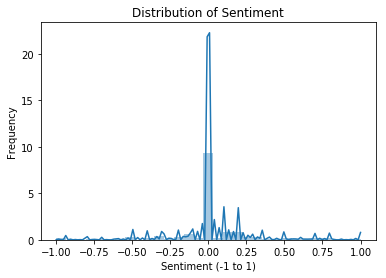

In [56]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sentiments)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (-1 to 1)')
plt.ylabel('Frequency')

It looks like people tend to be more positive about Kaggle than negative.

Let's look at the really negative tweets!  We'll define negative as less than or equal to -0.25.  We'll exclude all the tweets with links in them.

In [58]:
# Loop through sentiments and look for negative sentiments. 
for i in range(len(sentiments)):
    if sentiments[i] <= -0.25 and 'http' not in tweets_text[i]:
        print(tweets_text[i], sentiments[i])

b'@realDonaldTrump One day I will smile when you retweet something from Pornhub because youre too lazy and stupid to realize it.' -0.25
b'RT @LouDobbs: President @realDonaldTrump shows his strength while the Party of Hate continues their harassment. Joe diGenova &amp; @VicToensing' -0.8
b'@SpeakerPelosi @realDonaldTrump WRONG!!!' -0.9765625
b'RT @CheriJacobus: @realDonaldTrump Every GOP Senator just voted for a resolution saying the whistleblower complaint has to be given to Cong' -0.3
b'RT @LouDobbs: President @realDonaldTrump shows his strength while the Party of Hate continues their harassment. Joe diGenova &amp; @VicToensing' -0.8
b'@realDonaldTrump our President is being treated bad because he is bad. He is a bad human being.  He cares about nothing but lieing.' -0.5249999999999999
b'@realDonaldTrump People worldwide are holding corrupt people accountable. \n\nYOU will be fired by US Republicans ' -0.5
b'RT @SenThomTillis: Nancy Pelosi should be embarrassed. The transcript debunks

Let's look at the postive ones, too.  We'll define positive as greater than or equal to 0.25.

In [59]:
# Loop through sentiments and look for positive sentiments. 
for i in range(len(sentiments)):
    if sentiments[i] >= 0.25 and 'http' not in tweets_text[i]:
        print(tweets_text[i], sentiments[i])

b'RT @realFFK: Bible says surely they shall gather but it shall not be of me:whoever gathers against thee shall be scattered for thy sake!' 0.625
b'RT @kat2020maga: Listening to our wonderful President right now, talking about how the press didnt cover all the great things he accomplis' 0.6952380952380951
b'@mamiefishes @tedlieu @realDonaldTrump @POTUS Good comeback.' 0.7
b'RT @CameronLMitchel: @ProudResister @SpeakerPelosi @HouseDemocrats President Pelosi has a nice ring \n\n@SpeakerPelosi \n@realDonaldTrump @VP' 0.6
bRT @Franklin_Graham: It's rare to hear of a politician who's concerned about dividing the country, isn't it? Dem. Pres. Candidate @TulsiGab 0.3
b'RT @RepJeffDuncan: None of what Democrats said happened on the call between @realDonaldTrump &amp; Ukrainian President Zelensky was true. No qu' 0.35
b'@KimStrassel @realDonaldTrump No! The REAL STORY is, the transcript is as phony as tRump!' 0.25
b'RT @RepJeffDuncan: None of what Democrats said happened on the call between @re

It seems like there might be some false positives in there.  However, it's what we have to work with, so let's get a count of the "negative" (-1.00 to -0.25), "neutral" (-0.25 to 0.25), and "positive" (0.25 to 1.00) tweets.

In [60]:
# Loop through all of the sentiments and put them into the appropriate group
pos_neg_neutral = []
for sentiment in sentiments:
    if sentiment <= -0.25:
        pos_neg_neutral.append('negative')
    elif sentiment >= 0.25:
        pos_neg_neutral.append('positive')
    elif sentiment > -0.25 and sentiment < 0.25:
        pos_neg_neutral.append('neutral')

sns.barplot(np.array(pos_neg_neutral))
plt.title('Positive, Negative, and Neutral Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')

TypeError: cannot perform reduce with flexible type

We can see that most tweets are neutral, but there are far more positive tweets than negative tweets.

## Conclusion

We've made a few interesting discoveries here, but there is a lot more that could be explored.  You could collect more data, look at the sentiment for specific topics, track topic velocity over time, explore more complex topic modeling, and much more.  Natural Language Processing is a vast field with many subareas.  We've provided some links on the DAT5 readme to help you explore it more deeply.